Let's now talk about classification and as an introduction we will focus on binary classifcation where $y$ can take on only two values, 0 and 1. For instance, if we are trying to build a spam classifier for email, then $x^{(i)}$ may be some features of an email and $y^{(i)}$ may be 1 if it is a spam mail, and 0 otherwise. 

In the context of classification, we often use the following notation
* $y^{(i)}$ is also called the **label** values
* 0 is also called the **negative** class
* 1 is also called the **positive** class

In this notebook, we will look at logistic regression for binary classification task. First we import needed modules

In [4]:
# import modules
import numpy as np
import time, sys

# add parent to search path
if '..' not in sys.path:
    sys.path.insert(0, '..')

    
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

# imported helpers function   
from helpers import funcs, vis

# matplotlib inline
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Logistic regression
One could approach the classification above as a linear regression while ignoring the fact $y$ can only be either 0 or 1. However, this approach would perform poorly due to the following reasons
* the hypothesis function $h_\theta(x)$ is penalized if it is either much bigger than 1 or much smaller than 0
* $h_\theta(x)$ ignored the fact that $y$ can only be 0 or 1

To fix that, we will choose 

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}
$$

where 

$$
g(z) = \frac{1}{1+e^{-z}}
$$ 
is called the **logistic function** or the **sigmoid function**. Here is a plot showing $g(z)$

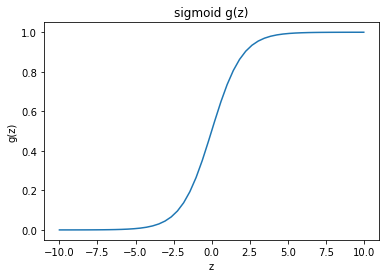

In [7]:
x = np.linspace(-10,10,50)
_ = vis.draw(x, funcs.sigmoid(x), 
             plot_type='plot', title='sigmoid g(z)',
             xy_labels = ['z', 'g(z)'])

The sigmoid function $g(z)$ has the following nice properties
* $g(z)\in [0, 1]$ for all $z\in\mathbb{R}$
* $g(z)$ is an increasing function and 
\begin{split}
\lim_{z\rightarrow -\infty} g(z) &= 0 \\
\lim_{z\rightarrow +\infty} g(z) &= 1
\end{split}
* $g(z)$ is continuous and its derivative is given by
$$
g'(z) = g(z)\left(1-g(z)\right)
$$

Now, we have chosen the hypothesis function, the next step is to define a loss function $L\left(h_\theta\left(x^{(i)}\right), y^{(i)}\right)$.

